##**About the dataset**

This dataset is obtained via one of my technical interviews. In this dataset, it consists of 1 month of campaign data. It included some key information to evaluate how successful a campaign is such as the number of visits, the chance of revisit, number of page views, transaction revenue and so on.



#**The Overall Project Purpose & Objectives of This Project- Business Understanding As The Core**

This project isn't a project that purely focuses on analytics, but one that focus on asking the right questions, helping businesses understand the status quo and figuring out what needs to be done next. Let's first understand the differences between operational decisions and strategic decisions.

**Operational decisions**: Short timeframe, narrow scope  (day-to-day activities and problem-solving), low risks and easily reversible.

**Strategic decisions**: Long timeframe, broad scope (overall organizational direction and goals), and high risk come with significant impacts.




#**How I Ask Questions and Why Does This Approach Work?**
In this practice, I separated questions into 2 parts, the first part is the questions themselves and the second part explains why these questions are asked.

This approach ensures that every question serves a specific purpose by targeting a single aspect of the business. By clearly defining the rationale behind each question, it helps prevent closely repetitive questions from being asked.



#**Understand Relevant Marketing Metrics**

Knowing this is a campaign/ marketing dataset, let's understand some important marketing metrics before analysing the data we have.

- Customer Lifetime Value (CLV): The total predicted revenue a customer will generate over their entire relationship with a company.


- Customer Acquisition Cost (CAC): The total cost of sales and marketing efforts required to acquire a new customer.


- Cost per Lead (CPL): he amount spent on marketing efforts to generate one new lead.


- Click Through Rate (CTR): The percentage of people who click on a specific link out of the total number who view it.


- Net Promoter Score (NPS): A measure of customer loyalty and satisfaction based on how likely customers are to recommend a company.


- Bounce Rate: The percentage of visitors who leave a website after viewing only one page.


- Return of Marketing Investment: he profit generated by a marketing campaign compared to its cost, usually expressed as a percentage.

#**The Differences Between CPC, CPM and CPL**

- Cost Per Click (CPC): The cost an advertiser pays for each click on their ad. CPC focus on driving traffic to the website.


- Cost Per Mile (CPM): The cost per thousand ad impressions. CPM focus on brand awareness and visibility.

- Cost Per Lead (CPL): The cost associated with acquiring a potential customer who has shown interest in a product or service. CPL focus on lead generation.



Risk Level: CPM is the lowest risk among all, while CPL is the highest risk but potentially the most rewarding.


## I**nstalling Libraries**

In [1]:
# Install packages
!pip install pyforest -q
!pip install pygal -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 2.8 MB/s eta 0:00:00


## **Importing Libraries**

In [2]:
import pygal# Import packages
import pyforest
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [3]:
# Read the file
df = pd.read_excel("ga_sessions(1)(1).xlsx")
df.info()

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71812 entries, 0 to 71811
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   visitId                      71812 non-null  int64         
 1   visitStartTime               71812 non-null  datetime64[ns]
 2   date                         71812 non-null  int64         
 3   visitNumber                  71812 non-null  int64         
 4   visits                       71812 non-null  int64         
 5   hits                         71812 non-null  int64         
 6   pageViews                    71796 non-null  float64       
 7   transactions                 1031 non-null   float64       
 8   newVisits                    54681 non-null  float64       
 9   transactionRevenueInDollars  71812 non-null  int64         
 10  timeOnScreen                 0 non-null      float64       
 11  sessionQualityDim            65823 non-nu

## **Exploratory Data Analysis (EDA)**

In [4]:
!pip install --upgrade markupsafe -q
!pip install --upgrade ydata-profiling -q
!pip install --upgrade jinja2 -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 83.9 MB/s eta 0:00:00


In [5]:
from ydata_profiling import ProfileReport
data_inspection= ProfileReport(df, title="Data Inspection")
data_inspection

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# Organising the data
df['pageViews']= pd.to_numeric(df['pageViews'], errors='coerce')
df['transactions']= pd.to_numeric(df['transactions'], errors='coerce')
df['newVisits']= pd.to_numeric(df['newVisits'], errors='coerce')
df['sessionQualityDim']= pd.to_numeric(df['sessionQualityDim'], errors='coerce')

# Fill NA
df['pageViews'].fillna(0, inplace=True)
df['transactions'].fillna(0, inplace=True)
df['newVisits'].fillna(0, inplace=True)
df['sessionQualityDim'].fillna(0, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# Dropped unnecessary columns and replace values
df.drop(['timeOnScreen'], axis=1, inplace=True)
df.drop(['date'], axis=1, inplace=True)
df['medium'].replace('(none)', 'direct', inplace=True)

In [8]:
# Convert into integer
df['visitId']= df['visitId'].astype(int)
df['pageViews']= df['pageViews'].astype(int)
df['transactions']= df['transactions'].astype(int)
df['newVisits']= df['newVisits'].astype(int)
df['sessionQualityDim']= df['sessionQualityDim'].astype(int)

In [9]:
# Listing all duplicated records
# Named as id_duplication
id_duplication= df[df.duplicated(['visitId'], keep=False)].sort_values('visitId')
id_duplication.shape

(2602, 17)

In [10]:
# From all the duplicated records, identify the record with positive transaction records
positive_transaction_dupID= id_duplication.query("transactions ==1").sort_values('visitId')
positive_transaction_dupID.shape

(44, 17)

In [11]:
# Create a new copy of original data and drop duplication
df2= df.copy()
df2= df2.drop_duplicates()

In [12]:
# Categorise the session quality into  5 category
# 1, 2-5, 6-20, 21-50, 51-100
# Define a function to categorize the values

# Category 1: 1 (lowest quality)
# Category 2: 2-5 (minimal engagement)
# Category 3: 6-20 (moderate engagement)
# Category 4: 21-50 (higher likelihood of convertion)
# Category 5: 51- 100 (highest quality, strongest intent to convert)

def categorize(value):
    if value == 0:
        return '0'
    elif value == 1:
        return '1'
    elif 2 <= value <= 5:
        return '2'
    elif 6 <= value <= 20:
        return '3'
    elif 21 <= value <= 50:
        return '4'
    elif 51 <= value <= 100:
        return '5'
    else:
        return 'Out of range'

# Apply the function to the dataframe
df2['session_quality_category']= df2['sessionQualityDim'].apply(categorize)

In [13]:
# Transfrom the session quality category
df2['session_quality_category']= df2['session_quality_category'].astype(int)

In [14]:
# Pull out the positive & negative transactions records from new copy
positive_sample= df2[df2['transactions']>=1]
negative_sample= df2[df2['transactions']==0]

#**Stimulation Questions for Operation Decisions**

The following questions are crafted to understand the status quo as well as facilitate operational decisions.

The questions focuses on 5 distinct aspects, inluded ***Customer Behavior, User Engagement, Resource Allocation and Value Optimisation!!***

Question 1: What is the bounce rate for the business? This tell us about the first impression a user perceive when they first landed in the webpages in term of content, design, and overall user experince.

Question 2: What is the proportion of customer revisit the business platform and made a transaction. This tell us about the proportion of customer revisit the platform before making a transaction.

Question 3: On median, at what level of sessionqualitydim will contribute to positive transaction? This tell us about  the engagement benchmark should focus to increase sales.

Question 4: How many page view on median a user browse prior
turn it into a transaction? This tell us about the overall user engagement (this included user journey, SEO, and content) before leading to a convertion.

Question 5: Among the positive transactions, where are the traffic come from? This tell us which sources-medium is in high succesful rate in bringing transaction.

Question 6: Where does the high-value transaction come from? This tell us where is the most cost effective way to bring in high value transactions.







In [15]:
# Question 1: What is the bounce rate for the business (as a whole)?
# Calculate total sessions and single-page sessions (bounce)
total_sessions = df2['pageViews'].sum()

# Calculate single-page sessions (where pageViews == 1)
single_page_sessions = df2[df2['pageViews'] == 1].shape[0]

# Calculate bounce rate
bounce_rate = (single_page_sessions / total_sessions) * 100

print(f"Bounce Rate for All Records: {bounce_rate:.2f}%")

Bounce Rate for All Records: 13.49%


**Conclusion 1: Based on what we compute, the business has a bounce rate of 13.49%. This low percentge of bounce rate tell the business that majority of users browse more than 1 page when they visit the business webpage, another terms high user engagement.**

In [16]:
# Question 2: What is the proportion of customer revisit the business platform and made a transaction.
revisit= positive_sample.query("newVisits ==1")

# Calculate the percentage
revisit_pos_trans= (len(revisit) / len(positive_sample)) * 100

# Round to 2 decimal places for readability
revisit_pos_trans_rounded= round(revisit_pos_trans, 2)
print(f"Percentage of positive transactions with new visits: {revisit_pos_trans_rounded}%")

Percentage of positive transactions with new visits: 36.76%


**Conclusion 2: 37% (More than 1/3) of customers has revisit the business platform more than 1 before make a transaction.**

In [17]:
# Question 3: On median, at what level of sessionqualitydim will contribute to positive transaction?
quality_to_trans= positive_sample.sort_values("sessionQualityDim", ascending=False)
quality_to_trans

# Let's find the median of session quality category
median_session_qualitycat= quality_to_trans['session_quality_category'].median()
median_session_qualitycat

# How if we wanted to have the actual session quality score?
median_session_quality= quality_to_trans['sessionQualityDim'].median()
median_session_quality

70.0

**Conclusion 3: Consumer who has a session quality of 70 and above are more likely a transaction.**

In [18]:
# Question 4: How many page view on median a user browse prior turn it into a transaction?
pageview_transactions= positive_sample.sort_values("pageViews", ascending=False)
pageview_transactions

# Find the median of the 'pageViews' column
median_pageviews= pageview_transactions['pageViews'].median()
print(f"The median value of pageViews for transactions is: {median_pageviews}")

The median value of pageViews for transactions is: 22.0


**Conclusion 4: On median, customer browse at least 22 pages before making a transaction.**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

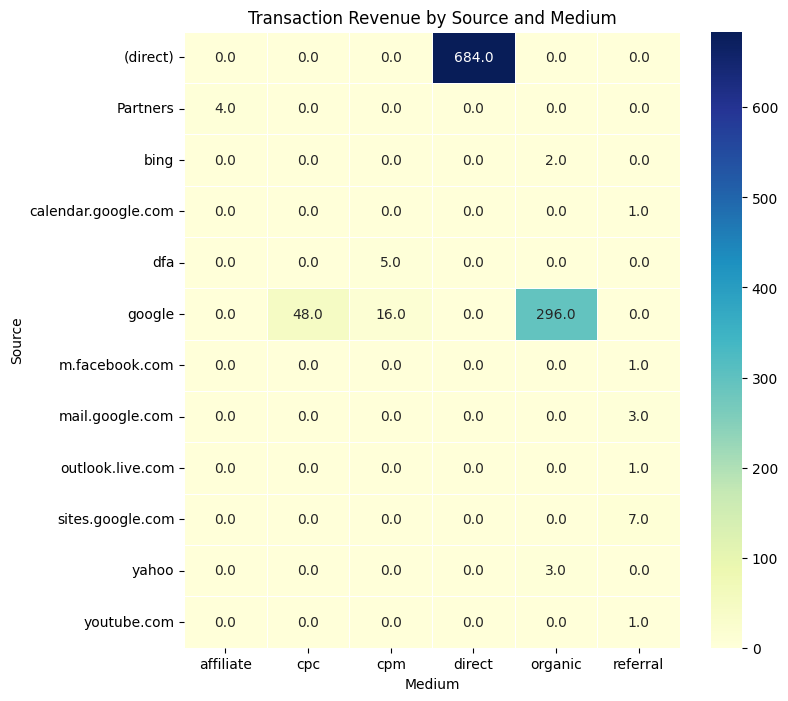

In [19]:
# Question 5: Among the positive transactions, where are the traffic come from?
traffic_transactions= positive_sample.pivot_table(index='source', columns='medium', values='transactions', aggfunc='sum')

# Fill NA with 0
traffic_transactions = traffic_transactions.fillna(0)

# Create a heatmap to visualise the data
plt.figure(figsize=(8, 8))
sns.heatmap(traffic_transactions, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=.5)
plt.title('Transaction Revenue by Source and Medium')
plt.xlabel('Medium')
plt.ylabel('Source')
plt.show()

**Conclusion 5: Majority of transactions come from both direct and organic medium. This mean that the business itself has a very strong brand recognition after all adn spend minimum in advertising.**

Definition of Direct Medium: A direct medium is where a customer reaches the bsuienss website without clear referral sources.

Definition of Organc Medium: Organic medium on the other hand is an unpaid traffic from the search engines.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

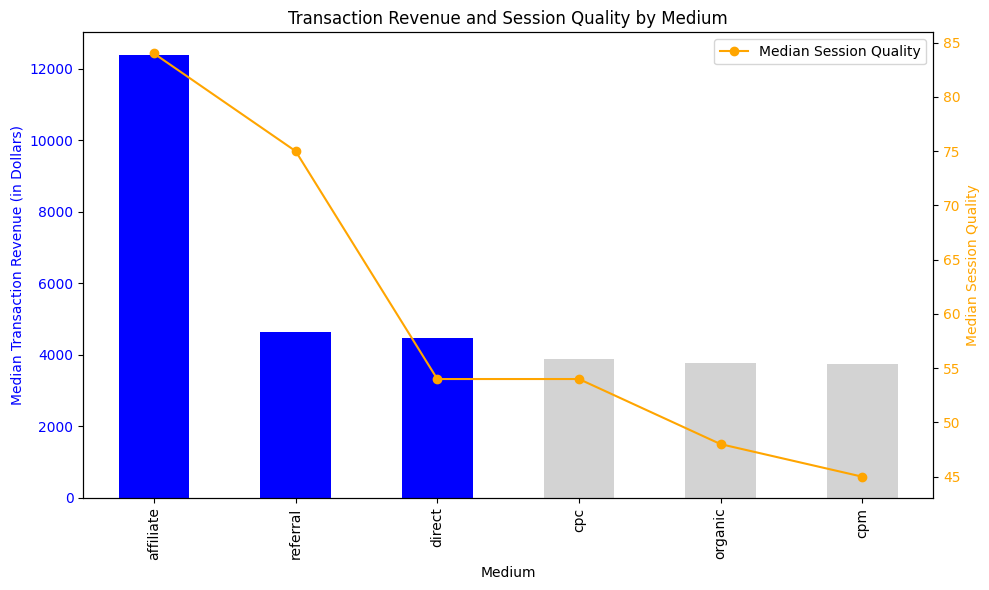

In [20]:
# Question 6: Where is the high value transaction come from?
medium_trans= positive_sample[['medium', 'transactionRevenueInDollars', 'pageViews', 'sessionQualityDim']]

# Calculate median transaction revenue by medium
medium_trans_med= medium_trans.groupby('medium')['transactionRevenueInDollars'].median().sort_values(ascending=False)  # why median?

# Calculate median session quality by medium
medium_trans_quality = medium_trans.groupby('medium')['sessionQualityDim'].median().sort_values(ascending=False)

# Create the bar chart with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot median transaction revenue on the primary y-axis
colors_1 = ['blue' if i < 3 else 'lightgrey' for i in range(len(medium_trans_med))]
medium_trans_med.plot(kind='bar', color=colors_1, ax=ax1)

# Add labels and title for the primary y-axis
ax1.set_xlabel('Medium')
ax1.set_ylabel('Median Transaction Revenue (in Dollars)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Transaction Revenue and Session Quality by Medium')

# Create a secondary y-axis for median session quality
ax2 = ax1.twinx()
ax2.plot(medium_trans_quality.index, medium_trans_quality, color='orange', marker='o', label='Median Session Quality')
ax2.set_ylabel('Median Session Quality', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add a legend for the secondary y-axis
ax2.legend(loc='upper right')

# Set x-axis labels to be horizontal
plt.xticks(rotation=0)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

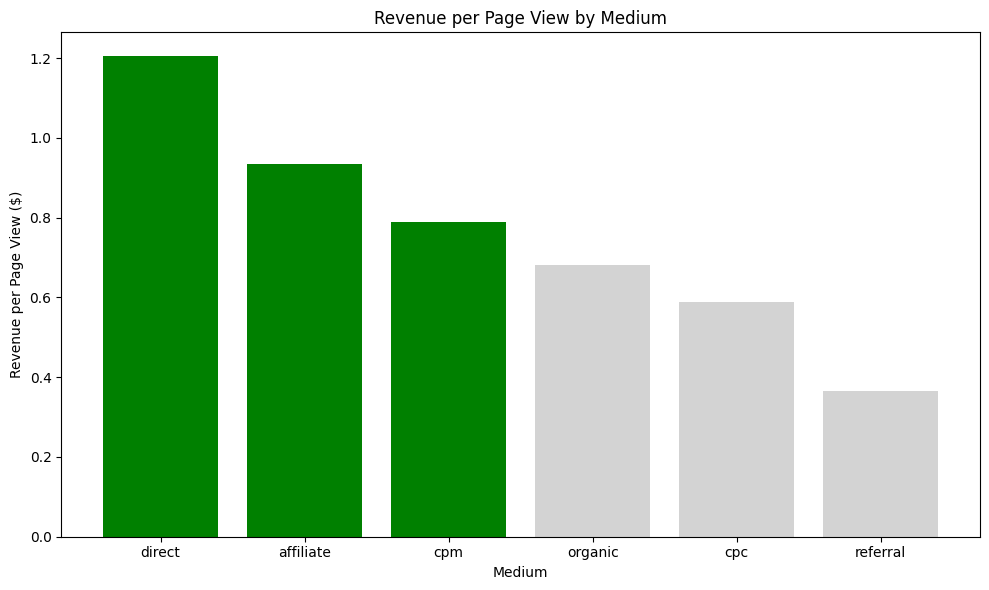

In [21]:
# Further analyse the data to obtain revenue per pageviews
# Group by 'medium' and calculate total revenue and page views
medium_trans_view_sum= medium_trans.groupby('medium')[['transactionRevenueInDollars', 'pageViews']].sum()

# Calculate total revenue and total page views across all mediums
total_revenue= medium_trans_view_sum['transactionRevenueInDollars'].sum()
total_page_views= medium_trans_view_sum['pageViews'].sum()

# Add normalized columns for revenue and page views as proportions of the total
medium_trans_view_sum['normalized_revenue']= medium_trans_view_sum['transactionRevenueInDollars'] / total_revenue
medium_trans_view_sum['normalized_page_views']= medium_trans_view_sum['pageViews'] / total_page_views

# Calculate revenue per page view
medium_trans_view_sum['revenue_per_pageview']= medium_trans_view_sum['normalized_revenue'] / medium_trans_view_sum['normalized_page_views']

# Sort by transaction revenue in descending order
medium_trans_view_sum= medium_trans_view_sum.sort_values(by='revenue_per_pageview', ascending=False)

# Create a color list: green for top 3, grey for others
colors_2 = ['green' if i < 3 else 'lightgrey' for i in range(len(medium_trans_view_sum))]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(medium_trans_view_sum.index, medium_trans_view_sum['revenue_per_pageview'], color=colors_2)

# Add labels and title
plt.xlabel('Medium')
plt.ylabel('Revenue per Page View ($)')
plt.title('Revenue per Page View by Medium')

# Set x-axis labels to be horizontal
plt.xticks(rotation=0)

# Show the chart
plt.tight_layout()
plt.show()

**Conclusion 6: Considering the median revenue transaction, affiliate marketing generate far superior revenue quality than other mediums. However, looking into revenue per pageview, direct medium generate highest revenue to the business. For every page viewed by customer, direct medium likely to generate $1.2 to the business.**




#**Understanding The Big Picture**
1. The business demonstrates strong and widespread brand awareness, as evidenced by the high volume of traffic from both direct and organic mediums.

2. Affiliate partnerships are a medium of high vlaue, while SEO has room to improve. This is based on organic search- with high traffic in organic search but low median transaction revenue.

3. CPM can be one of the effective mediums to increase both awareness and conversion rate if it is optimised correctly. Current results show that CPM has the third highest revenue per page view, however, its low median transaction values suggest that the current CPM strategy may not be fully efficient in bringing its full potential.




#**Strategic Questions All Should Consider- Using The 5 Whys**

1. What is the current affiliate strategy? What stopping the business from increasing the collaboration/ investment in affiliate marketing? Why is it despite high revenue and session quality of the affiliate marketing medium, the traffic remains the lowest among all mediums?

2. What factors within the referral program contribute to the low revenue per pageview despite both high session quality and high median revenue transaction? Which products are potentially involved in these transactions and what is the demographics look like interacting with the referral program?

3. What is the current cost-per-mile strategy? Why does the CPM show decent revenue per page view but contribute low-quality traffic after all? What can the business do to optimise the traffic and create more conversions?

4. What is the current Cost Per Acquisition (CPA), Return on Ad Spend (ROAS) and Return on Investment (ROI) across different channels? What adjustment should the business make in terms of resource allocation to improve both efficiency and profitability?




#**Recommendations**

Priority 1: Identify the potential affiliate partnership and target audience, to scale up the conversion and monitor the content.

Priority 2: Enhance the SEO performacne by optimising keywords search, this will allow users to find business website more effectively,particualrly through organic search.

Priority 3: Review and refine the current CPM strategies, first by understanding target audiences' needs, then increase awareness, as well as customer experience to drive conversion.


